In [1]:
Avg_acc_all_dataset=[]
Avg_acc_all_dataset_without_FS=[]
Avg_feature_all_dataset=[]
Avg_fitness_all_dataset=[]

In [2]:
import numpy as np
from random import randint
from random import uniform
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math

In [3]:
data=pd.read_csv('csv_result-JM1.csv')
data.head()

,id,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,label
0,1,1,7,0,0,4,3,1,11,25.05,...,59,0.09,174.56,280.54,28,31,15,12,14,N
1,2,5,37,0,6,19,16,10,85,81.19,...,351,0.04,3388.22,2225.29,147,204,59,22,98,N
2,3,2,1,0,0,1,1,1,10,56.44,...,37,0.35,25.17,159.91,17,20,15,5,14,Y
3,4,16,1,0,0,1,1,1,52,168.57,...,450,0.06,2697.42,2860.90,198,252,70,12,70,Y
4,5,0,7,0,0,4,2,3,9,14.32,...,26,0.13,47.33,110.45,9,17,7,12,12,N


In [4]:
data.shape

(7782, 23)

In [5]:
print(data.isnull().sum())



id                       0
LOC_BLANK                0
BRANCH_COUNT             0
LOC_CODE_AND_COMMENT     0
LOC_COMMENTS             0
CYCLOMATIC_COMPLEXITY    0
DESIGN_COMPLEXITY        0
ESSENTIAL_COMPLEXITY     0
LOC_EXECUTABLE           0
HALSTEAD_CONTENT         0
HALSTEAD_DIFFICULTY      0
HALSTEAD_EFFORT          0
HALSTEAD_ERROR_EST       0
HALSTEAD_LENGTH          0
HALSTEAD_LEVEL           0
HALSTEAD_PROG_TIME       0
HALSTEAD_VOLUME          0
NUM_OPERANDS             0
NUM_OPERATORS            0
NUM_UNIQUE_OPERANDS      0
NUM_UNIQUE_OPERATORS     0
LOC_TOTAL                0
label                    0
dtype: int64


In [6]:
#data=data.fillna(0)
#print(data.isnull().sum())

In [7]:
#Separate the features and output column

y=data.iloc[:,-1]
tdata=data.iloc[:,0:-1]
#tdata

In [8]:
from sklearn import preprocessing
from sklearn import utils
label = preprocessing.LabelEncoder()

y=label.fit_transform(y)
#y=label.fit_transform(y)

y


array([0, 0, 1, ..., 1, 0, 0])

In [9]:
max_itr=200
rows, columns= data.shape[0], data.shape[1]
NP=30 #Number of population
dim=columns-1 #Dimesnsion of the problem
repeat=10

In [10]:
from sklearn.model_selection import train_test_split

training_data,testing_data,training_classlebel,testing_classlebel=train_test_split(tdata,y,test_size=0.2,random_state=42)
training_data.shape,testing_data.shape,training_classlebel.shape,testing_classlebel.shape

((6225, 22), (1557, 22), (6225,), (1557,))

In [11]:
import random
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()


In [12]:

average_fitness=[]
average_accuracy=[]
average_accuracy_without_FS=[]
average_feature=[]

In [13]:
populationSize = NP # Number of search agents
Max_iteration = max_itr
lb = 0
ub = dim-1
# ub=1
Best_score_T = np.zeros(repeat)

for run in range(repeat):
    print(f'Run no: {run}')
    # initialize Golden jackal pair
    Male_Jackal_pos = np.zeros(dim)
    Male_Jackal_score = float('inf')
    Female_Jackal_pos = np.zeros(dim)
    Female_Jackal_score = float('inf')
    #fit=np.zeros(NP)
    Boundary_no = 1

    Positions = np.zeros((populationSize, dim)) #Declaration
    # If each variable has a different lb and ub
    if Boundary_no > 1:
        for i in range(dim):
            ub_i = ub[i]
            lb_i = lb[i]
            Positions[:,i] = np.random.rand(populationSize,1) * (ub_i - lb_i) + lb_i
    if Boundary_no == 1:
      for i in range(NP):
        for d in range(dim):
          if random.random()>0.5:
            Positions[i,d]=1
    
   

    pop_size = Positions.shape[0]
    Convergence_curve = []
    Positions_new = np.zeros(Positions.shape)
    l = 1

    

    # Main loop
    while l <= Max_iteration:
        u=np.zeros(Positions.shape)
        Male_Positions = np.zeros((populationSize,dim))
        Female_Positions = np.zeros((populationSize,dim))
        for i in range(Positions.shape[0]):
            # boundary checking
            Flag4ub = Positions[i,:] > ub
            Flag4lb = Positions[i,:] < lb
            Positions[i,:] = (Positions[i,:]*(~(Flag4ub + Flag4lb))) + ub*Flag4ub + lb*Flag4lb

            #Use Transfer function

            for j in range(dim):

              TF=1/(1+math.exp(-Positions_new[i,j])) #Transfer Function 1

              if TF<random.random():
                u[i,j]=0
              else:
                u[i,j]=1

              # TF=1/(1+math.exp((-10)*(Positions_new[i,j]-0.5))) #Transfer Function 2
              
              # if TF>random.random():
              #   u[i,j]=1
              # else:
              #   u[i,j]=0
            
            # Calculate Fitness for each search agent
            if((training_data.iloc[:,u[i,:]==1]).shape[1]==0):
              fitness=1
            else:  
              o1=dtc.fit(training_data.iloc[:,u[i,:]==1],training_classlebel)
              Ac1=dtc.predict(testing_data.iloc[:,u[i,:]==1])
              fitness=sum(Ac1!=testing_classlebel)/testing_data.shape[0]
            
            # Update Male Jackal 
            if fitness < Male_Jackal_score:
                Male_Jackal_score = fitness
                Male_Jackal_pos = u[i,:] #Check Later
                
            if fitness > Male_Jackal_score and fitness < Female_Jackal_score:
                Female_Jackal_score = fitness
                Female_Jackal_pos = u[i,:] #Check Later

        # for j in range(Positions.shape[0]):
        #     o1=dtc.fit(training_data.iloc[:,Positions[i,:]==1],training_classlebel)
        #     Ac1=dtc.predict(testing_data.iloc[:,Positions[i,:]==1])
        #     fitness=sum(Ac1!=testing_classlebel)/testing_data.shape[0]
        #     fitness_old[j] = fitness
        #     if fitness < King_fit:
        #         King_fit = fitness
        #         King = Positions[j,:]


        E1 = 1.5*(1-(l/Max_iteration))
        beta = 1.5
        num = math.gamma(1+beta)*math.sin(math.pi*beta/2) # used for Numerator 
        den = math.gamma((1+beta)/2)*beta*2**((beta-1)/2) # used for Denominator
        sigma_u = (num/den)**(1/beta) # Standard deviation
        u = np.random.normal(0, sigma_u, (NP, dim))
        v = np.random.normal(0, 1, (NP, dim))
        z = u/(abs(v)**(1/beta))
        RL = 0.05*z

        for i in range(Positions.shape[0]): #1
            for j in range(Positions.shape[1]): #2
                r1=np.random.rand() # r1 is a random number in [0,1]
                E0=2*r1-1;            
                E=E1*E0 # Evading energy

                if abs(E)<1:
                    # EXPLOITATION
                    D_male_jackal=abs((RL[i,j]*Male_Jackal_pos[j]-Positions[i,j]))
                    Male_Positions[i,j]=Male_Jackal_pos[j]-E*D_male_jackal
                    D_female_jackal=abs((RL[i,j]*Female_Jackal_pos[j]-Positions[i,j]))
                    Female_Positions[i,j]=Female_Jackal_pos[j]-E*D_female_jackal
                else:
                    # EXPLORATION
                    D_male_jackal=abs((Male_Jackal_pos[j]- RL[i,j]*Positions[i,j]))
                    Male_Positions[i,j]=Male_Jackal_pos[j]-E*D_male_jackal
                    D_female_jackal=abs((Female_Jackal_pos[j]- RL[i,j]*Positions[i,j]))
                    Female_Positions[i,j]=Female_Jackal_pos[j]-E*D_female_jackal
                Positions[i,j]=(Male_Positions[i,j]+Female_Positions[i,j])/2
        Convergence_curve.append(Male_Jackal_score)
                        
        l=l+1
        
    #Select features        

    Sf=[]
    for k in range(dim):
        if Male_Jackal_pos[k]>0.5:
            Sf.append(k)
    Nf=len(Sf)

    #Accuracy with FS

    o1=dtc.fit(training_data.iloc[:,Sf],training_classlebel)
    Ac1=dtc.predict(testing_data.iloc[:,Sf])
    Fnew2=sum(Ac1==testing_classlebel)/testing_data.shape[0]*100
    print('Selected no. of features: ', Nf)
    print("Accuracy with FS: ",Fnew2)


    #Accuracy without FS

    o1=dtc.fit(training_data,training_classlebel)
    Ac1=dtc.predict(testing_data)
    Fnew=sum(Ac1==testing_classlebel)/testing_data.shape[0]*100
    print("Accuracy without FS: ",Fnew)
    #average_accuracy_without_FS.append(Fnew)



Run no: 0
Selected no. of features:  4
Accuracy with FS:  73.85998715478485
Accuracy without FS:  69.42838792549774
Run no: 1
Selected no. of features:  2
Accuracy with FS:  79.44765574823379
Accuracy without FS:  69.36416184971098
Run no: 2
Selected no. of features:  4
Accuracy with FS:  74.11689145793193
Accuracy without FS:  69.81374438021837
Run no: 3
Selected no. of features:  4
Accuracy with FS:  73.7315350032113
Accuracy without FS:  70.26332691072575
Run no: 4
Selected no. of features:  3
Accuracy with FS:  74.373795761079
Accuracy without FS:  69.49261400128452
Run no: 5
Selected no. of features:  3
Accuracy with FS:  74.11689145793193
Accuracy without FS:  69.81374438021837
Run no: 6
Selected no. of features:  4
Accuracy with FS:  75.33718689788054
Accuracy without FS:  69.23570969813746
Run no: 7
Selected no. of features:  4
Accuracy with FS:  74.50224791265254
Accuracy without FS:  69.7495183044316
Run no: 8
Selected no. of features:  5
Accuracy with FS:  75.59409120102761


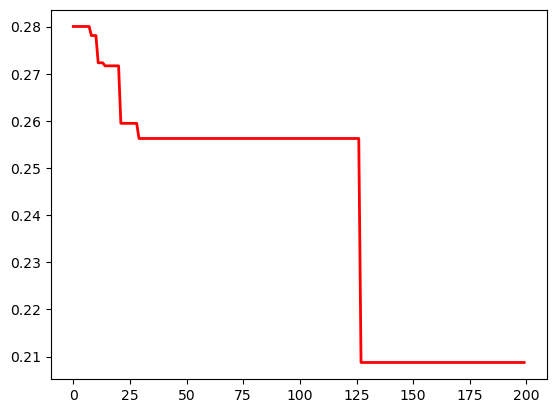

In [14]:
import matplotlib.pyplot as plt
plt.plot(Convergence_curve, color='r', linewidth=2)

In [15]:
import pickle

with open("JM1_DTfitness", "wb") as fp:   #Pickling
  pickle.dump(Convergence_curve, fp)
  

